In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
dataframeX = pd.read_csv('data/smallset.csv',usecols=[5,6,7,8])
dataframeY = pd.read_csv('data/smallsetY.csv',usecols=[8])
Xtest = dataframeX.as_matrix()
Ytest = dataframeY.as_matrix()

print(Ytest)

[[112.5 ]
 [115.91]
 [112.3 ]
 [111.5 ]
 [113.57]
 [112.67]
 [117.2 ]
 [115.24]
 [115.  ]
 [117.98]
 [111.5 ]
 [114.22]
 [118.76]
 [123.02]
 [123.5 ]
 [121.99]
 [122.  ]
 [122.88]
 [123.89]
 [126.7 ]
 [133.2 ]
 [131.98]
 [133.48]
 [129.75]
 [129.  ]
 [132.3 ]
 [128.8 ]
 [129.  ]
 [129.3 ]
 [122.29]
 [122.22]
 [121.42]
 [121.65]
 [118.  ]
 [111.5 ]
 [108.3 ]
 [100.  ]
 [106.35]
 [108.9 ]
 [108.15]
 [104.  ]
 [ 99.98]
 [ 99.99]
 [ 99.51]
 [101.7 ]
 [107.4 ]
 [108.25]
 [110.15]
 [109.5 ]
 [108.3 ]
 [107.6 ]
 [102.74]
 [103.95]
 [104.  ]
 [101.44]
 [ 94.65]
 [ 94.99]
 [ 96.61]
 [ 88.05]
 [ 90.13]
 [ 77.53]
 [ 80.53]
 [ 68.43]
 [ 70.28]
 [ 74.56]
 [ 76.52]
 [ 76.69]
 [ 86.76]
 [ 88.98]
 [ 93.59]
 [ 98.13]
 [ 94.69]
 [ 98.4 ]
 [ 97.45]
 [ 98.5 ]
 [ 90.58]
 [ 92.17]
 [ 89.39]
 [ 90.76]
 [ 91.61]
 [ 95.56]
 [ 94.51]
 [ 96.9 ]
 [ 96.02]
 [ 94.12]
 [ 99.76]
 [101.2 ]
 [107.99]
 [106.09]
 [104.  ]
 [104.5 ]
 [104.  ]
 [105.14]
 [106.22]
 [106.75]
 [106.75]
 [103.  ]
 [102.8 ]
 [103.  ]
 [105.  ]


In [3]:
rawdata = pd.read_csv('data/bitcoin.csv',usecols=[8])

print(rawdata.shape[0])
X = rawdata.head(rawdata.shape[0] - 5).as_matrix()
Y = rawdata.tail(rawdata.shape[0] - 5).as_matrix()

1745


In [5]:
# Trying to convert the input data, which starts off as dataframeX, must take 5 days and then transpose it
# and then convert it into a numpy array

rawdata = pd.read_csv('data/bitcoin.csv',usecols=[8])
days = 5
predict_delta = 7
print(rawdata.shape)

X = []
Y = rawdata.tail(rawdata.shape[0] - days - predict_delta).as_matrix().tolist()

for i in range(rawdata.shape[0]-days-predict_delta):
    X.append(rawdata.head(days + i).tail(days).as_matrix().transpose().tolist()[0])

X = np.array(X)
Y = np.array(Y)

print(Y.size)
print(X.size)

(1745, 1)
1733
8665


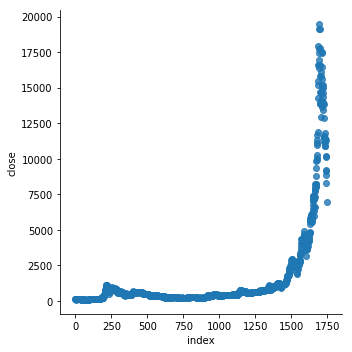

In [5]:
sns.lmplot('index','close', data=rawdata.reset_index(),fit_reg=False)
plt.show()

In [6]:
model = Sequential()
model.add(Dense(1,input_shape=(5,)))
model.add(Activation('relu'))

sgd = SGD(0.01)

model.compile(loss='msle',optimizer=sgd, metrics=['msle'])

H = model.fit(X, Y, epochs=10)

Epoch 1/10


InternalError: Blas GEMV launch failed:  m=5, n=32
	 [[Node: dense_2/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_dense_2_input_0_2/_33, dense_2/kernel/read)]]
	 [[Node: metrics_1/mean_squared_logarithmic_error/Mean_1/_83 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_256_metrics_1/mean_squared_logarithmic_error/Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'dense_2/MatMul', defined at:
  File "c:\program files\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\program files\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\program files\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\program files\python36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\program files\python36\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "c:\program files\python36\lib\site-packages\tornado\platform\asyncio.py", line 112, in start
    self.asyncio_loop.run_forever()
  File "c:\program files\python36\lib\asyncio\base_events.py", line 421, in run_forever
    self._run_once()
  File "c:\program files\python36\lib\asyncio\base_events.py", line 1431, in _run_once
    handle._run()
  File "c:\program files\python36\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "c:\program files\python36\lib\site-packages\tornado\platform\asyncio.py", line 102, in _handle_events
    handler_func(fileobj, events)
  File "c:\program files\python36\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\program files\python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "c:\program files\python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "c:\program files\python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "c:\program files\python36\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\program files\python36\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "c:\program files\python36\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "c:\program files\python36\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "c:\program files\python36\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\program files\python36\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\program files\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\program files\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "c:\program files\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-1107fe8a319f>", line 2, in <module>
    model.add(Dense(1,input_shape=(5,)))
  File "c:\program files\python36\lib\site-packages\keras\models.py", line 467, in add
    layer(x)
  File "c:\program files\python36\lib\site-packages\keras\engine\topology.py", line 619, in __call__
    output = self.call(inputs, **kwargs)
  File "c:\program files\python36\lib\site-packages\keras\layers\core.py", line 855, in call
    output = K.dot(inputs, self.kernel)
  File "c:\program files\python36\lib\site-packages\keras\backend\tensorflow_backend.py", line 1075, in dot
    out = tf.matmul(x, y)
  File "c:\program files\python36\lib\site-packages\tensorflow\python\ops\math_ops.py", line 2064, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "c:\program files\python36\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 2790, in _mat_mul
    name=name)
  File "c:\program files\python36\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\program files\python36\lib\site-packages\tensorflow\python\framework\ops.py", line 3271, in create_op
    op_def=op_def)
  File "c:\program files\python36\lib\site-packages\tensorflow\python\framework\ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): Blas GEMV launch failed:  m=5, n=32
	 [[Node: dense_2/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_dense_2_input_0_2/_33, dense_2/kernel/read)]]
	 [[Node: metrics_1/mean_squared_logarithmic_error/Mean_1/_83 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_256_metrics_1/mean_squared_logarithmic_error/Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [15]:
# Feburary 11th through Feburary 15th
XVal = np.array([[8070.8, 8891.21, 8516.24, 9477.84, 10016.49]])
print(XVal) # Predicing Feburary 22nd Price
model.predict(XVal)

[[ 8070.8   8891.21  8516.24  9477.84 10016.49]]


array([[8690.175]], dtype=float32)